Requirements Qiskit

Necessário criar ambiente virtual: python3 -m venv c:\path\to\virtual\environment

Tutorial atualizado: https://docs.quantum.ibm.com/guides/install-qiskit

Para criar conta IBM Quantum: https://quantum.ibm.com/ 

Para criar conta e instância na IBM Cloud: https://cloud.ibm.com/catalog/services/quantum-computing

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

c:\Users\...\python.exe -m pip install ipykernel -U --force-reinstall


Configuração da conta

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="e2124d274be1fc9a5fd39f085869e242667ff4b7e3d442c843f6519b54677103f3c7371bbb8c248011422d2c863c4e482bd2bcaffeffbd8ae5a1f7179f28e005",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

Teste job em execução

In [4]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: ct63n0cqsez00089nd70
PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


In [28]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

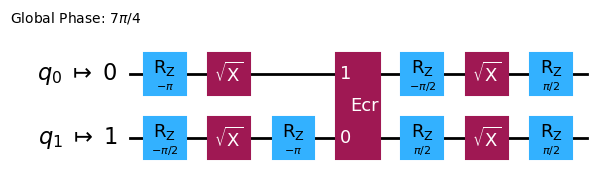

In [36]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw('mpl', idle_wires=False)

In [29]:
# Construct the Estimator instance.
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: a393e648-1bc0-46a3-aac4-a7752a967abd


Estado de Bell

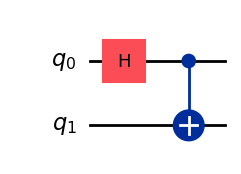

In [35]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Cria um circuito com 2 qubits
qc = QuantumCircuit(2)
 
# Add Porta Hadamard A qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

qc.draw("mpl")

Bell State 1:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Desenho do Bell State 1:


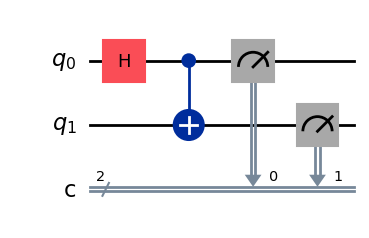

In [45]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram

# Definindo registradores quânticos e clássicos
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Função para criar o primeiro estado de Bell
def firstBellState():
    circuit = QuantumCircuit(q, c)
    circuit.h(q[0])  # Porta Hadamard 
    circuit.cx(q[0], q[1])  # Porta CNOT
    circuit.measure(q, c)  # Medição dos qubits
    return circuit

# Função para criar o segundo estado de Bell
def secondBellState():
    circuit = QuantumCircuit(q, c)
    circuit.x(q[0])  # Porta Pauli-X 
    circuit.h(q[0])  # Porta Hadamard 
    circuit.cx(q[0], q[1])  # Porta CNOT
    circuit.measure(q, c)  # Medição dos qubits
    return circuit

# Função para criar o terceiro estado de Bell
def thirdBellState():
    circuit = QuantumCircuit(q, c)
    circuit.x(q[1])  # Porta Pauli-X 
    circuit.h(q[0])  # Porta Hadamard 
    circuit.cx(q[0], q[1])  # Porta CNOT
    circuit.measure(q, c)  # Medição dos qubits
    return circuit

# Função para criar o quarto estado de Bell
def fourthBellState():
    circuit = QuantumCircuit(q, c)
    circuit.x(q[1])  # Porta Pauli-X 
    circuit.h(q[0])  # Porta Hadamard 
    circuit.z(q[0])  # Porta Pauli-Z
    circuit.z(q[1])  # Porta Pauli-Z
    circuit.cx(q[0], q[1])  # Porta CNOT
    circuit.measure(q, c)  # Medição dos qubits
    return circuit

# Criando e desenhando circuitos
print("Bell State 1:")
circuit1 = firstBellState()
print(circuit1)
print("Desenho do Bell State 1:")
circuit1.draw("mpl")





Bell State 2:
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
Desenho do Bell State 2:


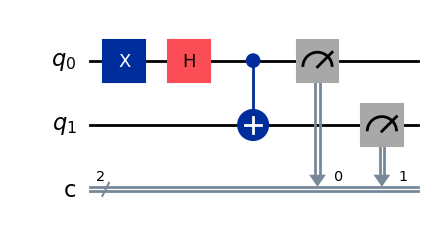

In [46]:
print("\nBell State 2:")
circuit2 = secondBellState()
print(circuit2)
print("Desenho do Bell State 2:")
circuit2.draw("mpl")



Bell State 3:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Desenho do Bell State 3:


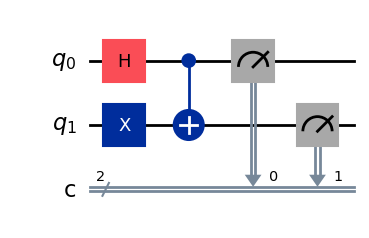

In [47]:
print("\nBell State 3:")
circuit3 = thirdBellState()
print(circuit3)
print("Desenho do Bell State 3:")
circuit3.draw("mpl")



Bell State 4:
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ H ├┤ Z ├──■──┤M├───
     ├───┤├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ Z ├┤ X ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 
Desenho do Bell State 4:


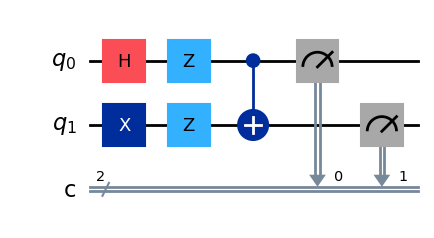

In [48]:
print("\nBell State 4:")
circuit4 = fourthBellState()
print(circuit4)
print("Desenho do Bell State 4:")
circuit4.draw("mpl")